In [1]:
import numpy as np
import pandas as pd
from keras.models import load_model
from sklearn.metrics import mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed = 7
np.random.seed(seed)

In [3]:
model = load_model('models/DeepJEC.h5')

/Users/rohan/anaconda/lib/python2.7/site-packages/keras/engine/topology.py:1252: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


In [4]:
jet_images = np.load('data/jet_images.npy')
df_dict_jets = pd.read_pickle('data/df_dict_jets.pkl')

In [5]:
true_train = df_dict_jets['jet_jes']
pred_train = model.predict([jet_images, df_dict_jets['jet_pt'], df_dict_jets['jet_eta']])

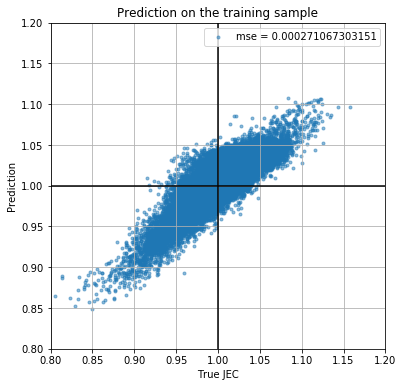

In [8]:
mse = mean_squared_error(true_train, pred_train)
plt.figure(figsize=(6,6))
plt.grid()
plt.scatter(true_train, pred_train, label='mse = {}'.format(mse), alpha=0.5 , marker='.')
plt.title('Prediction on the training sample')
plt.xlim((0.8,1.2))
plt.ylim((0.8,1.2))
plt.hlines(1., 0.8,1.2)
plt.vlines(1., 0.8,1.2)
plt.xlabel('True JEC')
plt.ylabel('Prediction')
plt.legend()
plt.show()

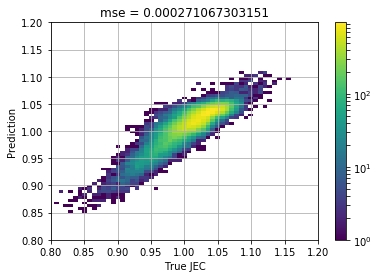

In [12]:
from matplotlib.colors import LogNorm
plt.grid()
plt.hist2d(true_train, pred_train[:,0], bins=50, norm=LogNorm())
plt.colorbar()
plt.xlabel( 'True JEC')
plt.ylabel('Prediction')
plt.title('mse = {}'.format(mse))
plt.xlim(0.8, 1.2)
plt.ylim(0.8, 1.2)
plt.show()

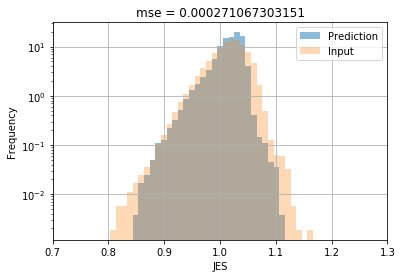

In [15]:
bins = np.linspace(0.5, 1.5, 100)
plt.figure()
plt.grid()
plt.hist(pred_train, bins, label='Prediction', alpha=0.5, normed=True)
plt.hist(true_train, bins, label='Input', alpha=0.3, normed=True)
plt.xlabel('JES')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(0.7, 1.3)
plt.title('mse = {}'.format(mean_squared_error(true_train, pred_train)))
plt.legend()
plt.show()

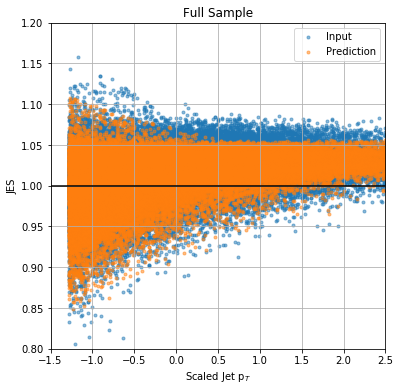

In [68]:
plt.figure(figsize=(6,6))
plt.grid()
plt.title('Full Sample')
plt.scatter( df_dict_jets['jet_pt'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_dict_jets['jet_pt'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.hlines(1., -1.5,2.5)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet p$_{T}$')
plt.ylabel('JES')
plt.legend()
plt.show()

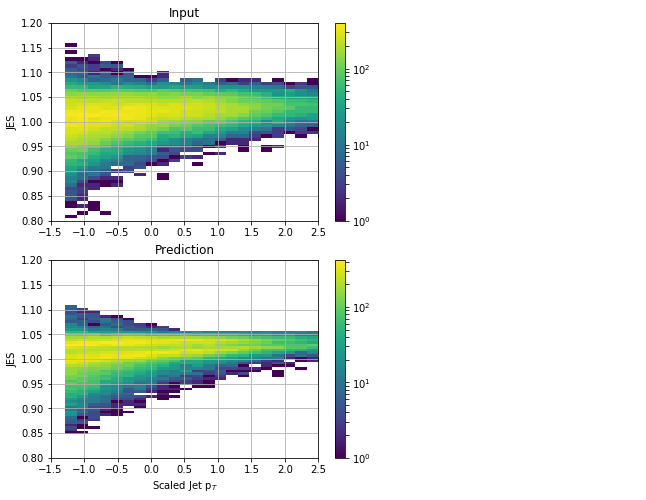

In [86]:
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.grid()
plt.title('Input')
plt.hist2d(df_dict_jets['jet_pt'], true_train, bins=50, norm=LogNorm())
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.ylabel('JES')
plt.colorbar()
plt.subplot(212)
plt.grid()
plt.title('Prediction')
plt.hist2d(df_dict_jets['jet_pt'], pred_train[:,0], bins=50, norm=LogNorm())
plt.xlim((-1.5,2.5))
plt.ylim((0.8,1.2))
plt.xlabel(r'Scaled Jet p$_{T}$')
plt.ylabel('JES')
plt.colorbar()
plt.show()

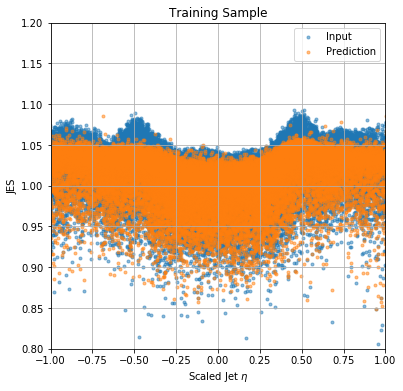

In [74]:
plt.figure(figsize=(6,6))
plt.grid()
plt.title('Training Sample')
plt.scatter( df_dict_jets['jet_eta'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_dict_jets['jet_eta'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((-1.,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('JES')
plt.legend()
plt.show()

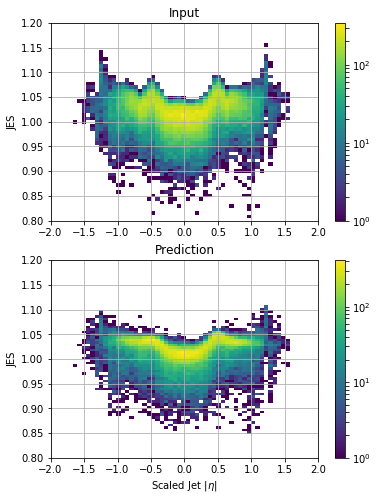

In [77]:
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.grid()
plt.title('Input')
plt.hist2d(df_dict_jets['jet_eta'], true_train, bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((0.8,1.2))
#plt.xlabel(r'Scaled Jet p$_{T}$')
plt.ylabel('JES')
plt.colorbar()
plt.subplot(212)
plt.grid()
plt.title('Prediction')
plt.hist2d(df_dict_jets['jet_eta'], pred_train[:,0], bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((0.8,1.2))
plt.xlabel(r'Scaled Jet |$\eta$|')
plt.ylabel('JES')
plt.colorbar()
plt.show()

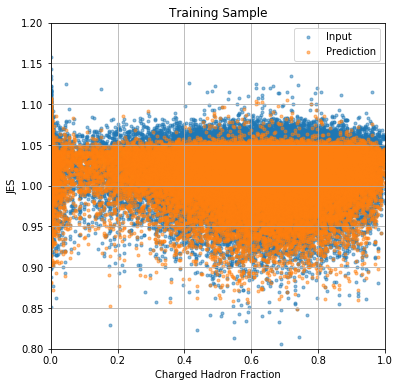

In [87]:
plt.figure(figsize=(6,6))
plt.grid()
plt.title('Training Sample')
plt.scatter( df_dict_jets['chf'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_dict_jets['chf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Charged Hadron Fraction')
plt.ylabel('JES')
plt.legend()
plt.show()

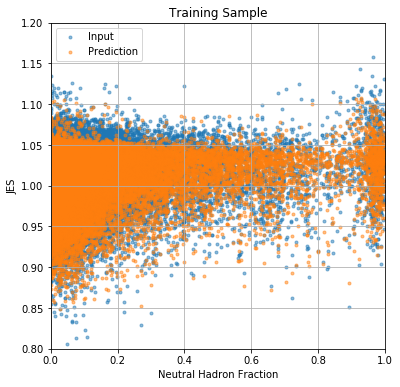

In [88]:
plt.figure(figsize=(6,6))
plt.grid()
plt.title('Training Sample')
plt.scatter( df_dict_jets['nhf'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_dict_jets['nhf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Neutral Hadron Fraction')
plt.ylabel('JES')
plt.legend()
plt.show()

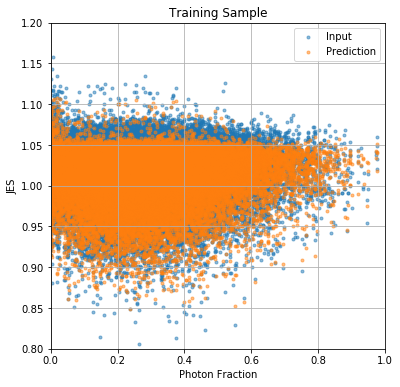

In [89]:
plt.figure(figsize=(6,6))
plt.grid()
plt.title('Training Sample')
plt.scatter( df_dict_jets['phf'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_dict_jets['phf'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,1.))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Photon Fraction')
plt.ylabel('JES')
plt.legend()
plt.show()

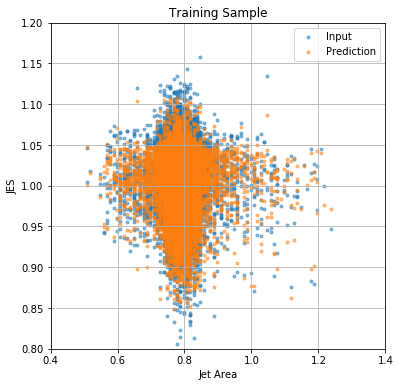

In [90]:
plt.figure(figsize=(6,6))
plt.grid()
plt.title('Training Sample')
plt.scatter( df_dict_jets['jet_area'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_dict_jets['jet_area'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0.4,1.4))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel('Jet Area')
plt.ylabel('JES')
plt.legend()
plt.show()

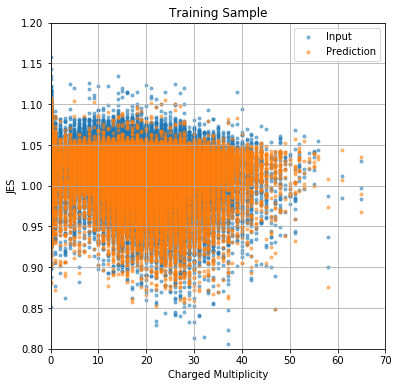

In [91]:
plt.figure(figsize=(6,6))
plt.grid()
plt.title('Training Sample')
plt.scatter( df_dict_jets['chm'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_dict_jets['chm'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,70))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.xlabel('Charged Multiplicity')
plt.ylabel('JES')
plt.legend()
plt.show()

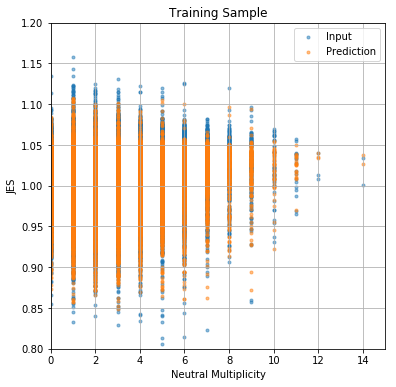

In [92]:
plt.figure(figsize=(6,6))
plt.grid()
plt.title('Training Sample')
plt.scatter( df_dict_jets['nhm'], true_train, label='Input ', alpha=0.5 , marker='.')
plt.scatter( df_dict_jets['nhm'], pred_train, label='Prediction', alpha=0.5 , marker='.')
plt.xlim((0,15))
plt.ylim((0.8,1.2))
plt.hlines(5., -1.,1.)
plt.xlabel('Neutral Multiplicity')
plt.ylabel('JES')
plt.legend()
plt.show()

In [38]:
residual_train = (true_train - pred_train[:,0])/true_train

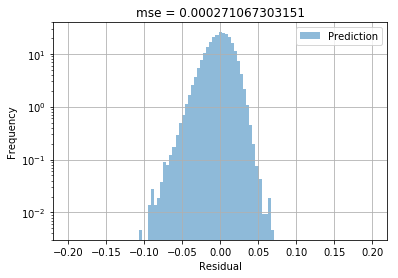

In [39]:
bins = np.linspace(-0.2, 0.2, 100)
plt.figure()
plt.grid()
plt.hist(residual_train, bins, label='Prediction', alpha=0.5, normed=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('mse = {}'.format(mean_squared_error(true_train, pred_train)))
plt.legend()
plt.show()

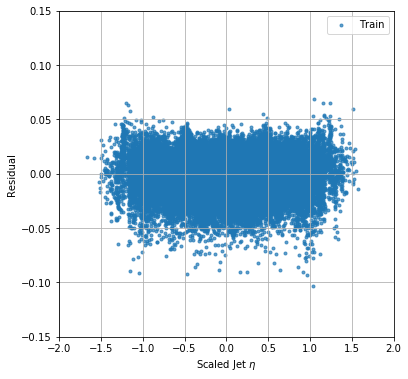

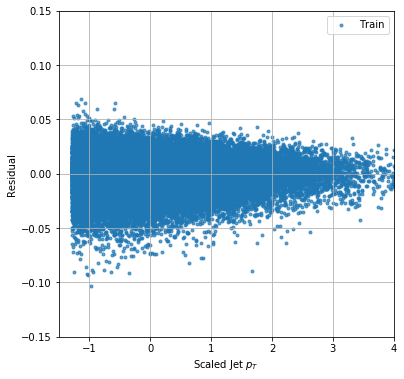

In [34]:
plt.figure(figsize=(6,6))
plt.grid()
plt.scatter( df_dict_jets['jet_eta'], residual_train, label='Train', alpha=0.7 , marker='.')
plt.xlim((-2.,2.))
plt.ylim((-0.15,0.15))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('Residual')
plt.legend()
plt.show()
plt.figure(figsize=(6,6))
plt.grid()
plt.scatter( df_dict_jets['jet_pt'], residual_train, label='Train', alpha=0.7 , marker='.')
plt.xlim((-1.5,4))
plt.ylim((-0.15,0.15))
plt.hlines(5., -1.,1.)
plt.vlines(3.0, 0.8,1.2)
plt.xlabel(r'Scaled Jet $p_{T}$')
plt.ylabel('Residual')
plt.legend()
plt.show()

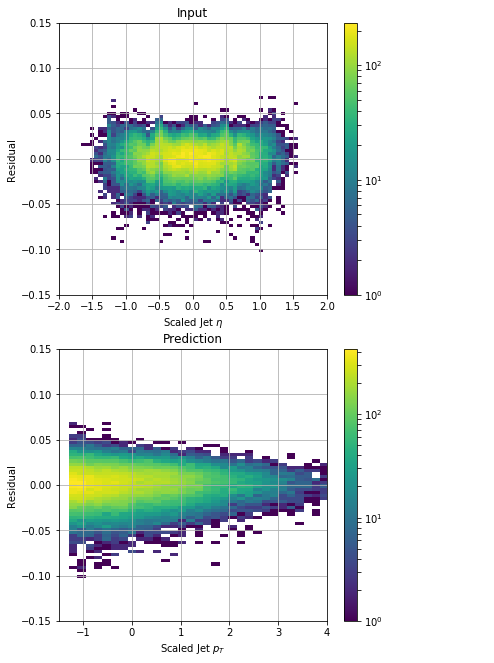

In [35]:
plt.figure(figsize=(6,11))
plt.subplot(211)
plt.grid()
plt.title('Input')
plt.hist2d(df_dict_jets['jet_eta'], residual_train, bins=50, norm=LogNorm())
plt.xlim((-2.,2.))
plt.ylim((-0.15,0.15))
plt.xlabel(r'Scaled Jet $\eta$')
plt.ylabel('Residual')
plt.colorbar()
plt.subplot(212)
plt.grid()
plt.title('Prediction')
plt.hist2d(df_dict_jets['jet_pt'], residual_train, bins=50, norm=LogNorm())
plt.xlim((-1.5,4))
plt.ylim((-0.15,0.15))
plt.xlabel(r'Scaled Jet $p_{T}$')
plt.ylabel('Residual')
plt.colorbar()
plt.show()